In [1]:
import cv2
import re
import numpy as np
import dask as d
import matplotlib.pyplot as plt

from glob import glob

In [2]:
from fl_tissue_model_tools import dev_config, defs
from fl_tissue_model_tools import preprocessing as prep
from fl_tissue_model_tools import zstacks as zs

In [3]:
dirs = dev_config.get_dev_directories("../dev_paths.txt")

In [4]:
# z_paths = [fn.replace("\\", "/") for fn in glob(f"{dirs.data_dir}/z_projection/A1/*.tif")]

In [5]:
# def get_z_stack(z_dir, file_ext, descending):
#     z_paths = [fn.replace("\\", "/") for fn in glob(f"{z_dir}/*.{file_ext}")]
#     def get_zpos(z_path):
#         pattern = "(z|Z)[0-9]+"
#         # Trim Z from the beginning of the match
#         return int(re.search(pattern, z_path)[0][1:])
        
#     sorted_z_paths = sorted(z_paths, key = lambda x: get_zpos(x), reverse=descending)
#     return sorted_z_paths, np.array([cv2.imread(img, cv2.IMREAD_ANYDEPTH) for img in sorted_z_paths])

In [6]:
z_paths, z_stack = zs.z_stack_from_dir(f"{dirs.data_dir}/z_projection/A1", "tif", descending=True)
z_stack = prep.min_max_(z_stack, defs.GS_MIN, defs.GS_MAX, defs.TIF_MIN, defs.TIF_MAX)

# Projections

## Average projection

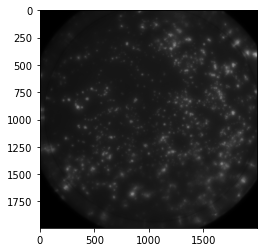

In [14]:
avg_proj = zs.proj_avg(z_stack, axis=0)
plt.imshow(avg_proj, cmap="gray", vmin=0, vmax=255)
plt.show()

## Max projection

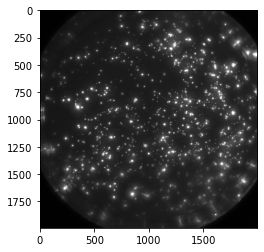

In [15]:
max_proj = zs.proj_max(z_stack, axis=0)
plt.imshow(max_proj, cmap="gray", vmin=0, vmax=255)
plt.show()

## Min projection

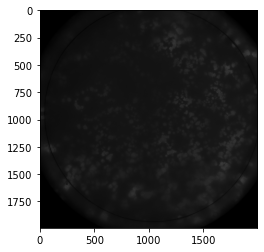

In [16]:
min_proj = zs.proj_min(z_stack, axis=0)
plt.imshow(min_proj, cmap="gray", vmin=0, vmax=255)
plt.show()